In [2]:
import pandas as pd
import bagpy
from bagpy import bagreader
from collections import defaultdict
from os import path
import keras
from PIL import Image
import numpy as np
from keras.applications import vgg16


Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


Python older than 3.7 detected. 


In [19]:
b = bagreader('/home/ai/Desktop/Rayne/research-FL-Rayne/Udacitydataset/Ch2_002/HMB_1.bag')

[INFO]  Data folder /home/ai/Desktop/Rayne/research-FL-Rayne/Udacitydataset/Ch2_002/HMB_1 already exists. Not creating.


In [20]:
def read_steerings(steering_log):
    steerings = defaultdict(list)
    for i in range(0,len(steering_log['Time'])):
        second = float(steering_log['Time'][i])
        angle = float(steering_log['steering_wheel_angle'][i])
        timestamp = "%.1f" %second
        steerings[timestamp].append(angle)
    return steerings 

In [21]:
#read steering angle report
df_steering_1 = pd.read_csv('/home/ai/Desktop/Rayne/research-FL-Rayne/Udacitydataset/Ch2_002/HMB_1/vehicle-steering_report.csv')
df_steering_2 = pd.read_csv('/home/ai/Desktop/Rayne/research-FL-Rayne/Udacitydataset/Ch2_002/HMB_2/vehicle-steering_report.csv')
df_steering_4 = pd.read_csv('/home/ai/Desktop/Rayne/research-FL-Rayne/Udacitydataset/Ch2_002/HMB_4/vehicle-steering_report.csv')
df_steering_5 = pd.read_csv('/home/ai/Desktop/Rayne/research-FL-Rayne/Udacitydataset/Ch2_002/HMB_5/vehicle-steering_report.csv')
df_steering_6 = pd.read_csv('/home/ai/Desktop/Rayne/research-FL-Rayne/Udacitydataset/Ch2_002/HMB_6/vehicle-steering_report.csv')


In [22]:
steerings_1 = read_steerings(df_steering_1)
steerings_2 = read_steerings(df_steering_2)
steerings_4 = read_steerings(df_steering_4)
steerings_5 = read_steerings(df_steering_5)
steerings_6 = read_steerings(df_steering_6)

In [23]:
steerings_1_processed = []
for i in range(0,len(list(steerings_1.keys()))):
    steerings_1_processed.append(np.mean(steerings_1[list(steerings_1.keys())[i]]))

steerings_2_processed = []
for i in range(0,len(list(steerings_2.keys()))):
    steerings_2_processed.append(np.mean(steerings_2[list(steerings_2.keys())[i]]))

steerings_4_processed = []
for i in range(0,len(list(steerings_4.keys()))):
    steerings_4_processed.append(np.mean(steerings_4[list(steerings_4.keys())[i]]))

steerings_5_processed = []
for i in range(0,len(list(steerings_5.keys()))):
    steerings_5_processed.append(np.mean(steerings_5[list(steerings_5.keys())[i]]))

steerings_6_processed = []
for i in range(0,len(list(steerings_6.keys()))):
    steerings_6_processed.append(np.mean(steerings_6[list(steerings_6.keys())[i]]))

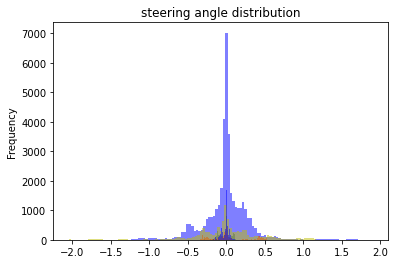

In [24]:
import matplotlib.pyplot as plt 
x1 = list(df_steering_1['steering_wheel_angle'])
x2 = list(df_steering_2['steering_wheel_angle'])
x4 = list(df_steering_4['steering_wheel_angle'])
x5 = list(df_steering_5['steering_wheel_angle'])
x6 = list(df_steering_6['steering_wheel_angle'])
plt.hist(x1,bins = 100,color = 'g', alpha = 0.5, label = 'HMB_1')
plt.hist(x2,bins = 100,color = 'b', alpha = 0.5, label = 'HMB_2')
plt.hist(x4,bins = 100,color = 'r', alpha = 0.5, label = 'HMB_4')
plt.hist(x5,bins = 100,color = 'y', alpha = 0.5, label = 'HMB_5')
plt.hist(x6,bins = 100,color = 'b', alpha = 0.5, label = 'HMB_6')
plt.gca().set(title='steering angle distribution', ylabel='Frequency');

(0.0, 400.0)

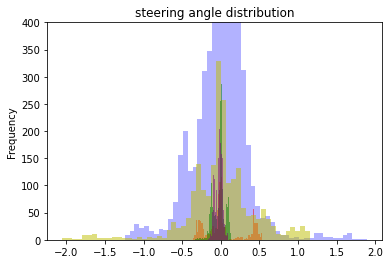

In [25]:
import matplotlib.pyplot as plt 

plt.hist(steerings_2_processed,bins = 50,color = 'b', alpha = 0.3, label = 'HMB_2')
plt.hist(steerings_4_processed,bins = 50,color = 'r', alpha = 0.5, label = 'HMB_4')
plt.hist(steerings_5_processed,bins = 50,color = 'y', alpha = 0.5, label = 'HMB_5')
plt.hist(steerings_1_processed,bins = 50,color = 'g', alpha = 0.5, label = 'HMB_1')
plt.hist(steerings_6_processed,bins = 50,color = 'purple', alpha = 0.5, label = 'HMB_6')
plt.gca().set(title='steering angle distribution', ylabel='Frequency');
plt.ylim(0,400)

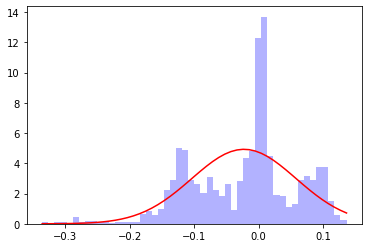

In [26]:
import scipy
_, bins, _ = plt.hist(steerings_1_processed, 50, density=1, alpha=0.3,color = 'b')
mu, sigma = scipy.stats.norm.fit(steerings_1_processed)
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line, color = 'r')

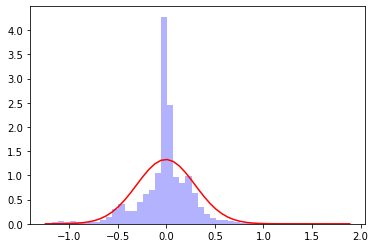

In [27]:
_, bins, _ = plt.hist(steerings_2_processed, 50, density=1, alpha=0.3,color = 'b')
mu, sigma = scipy.stats.norm.fit(steerings_2_processed)
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line, color = 'r')

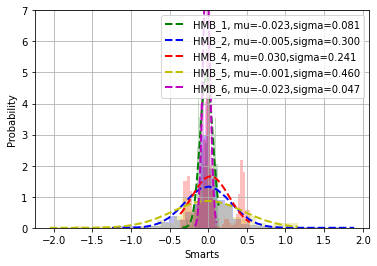

In [28]:
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


# best fit of data
(mu1, sigma1) = norm.fit(steerings_1_processed)

# the histogram of the data
n, bins, patches = plt.hist(steerings_1_processed, 30, density = True, facecolor='g', alpha=0.25)

# add a 'best fit' line
y1 = norm.pdf(bins, mu1, sigma1)
l = plt.plot(bins, y1, 'g--', linewidth=2, label = 'HMB_1, mu=%.3f,sigma=%.3f' %(mu1, sigma1) )

#plot
plt.xlabel('Smarts')
plt.ylabel('Probability')
#plt.title(r'$\mathrm{Histogram\ of\ 1:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu1, sigma1))

# best fit of data
(mu2, sigma2) = norm.fit(steerings_2_processed)

# the histogram of the data
n, bins, patches = plt.hist(steerings_2_processed, 30, density = True, facecolor='b', alpha=0.25)

# add a 'best fit' line
y2 = norm.pdf(bins, mu2, sigma2)
l = plt.plot(bins, y2, 'b--', linewidth=2, label = 'HMB_2, mu=%.3f,sigma=%.3f' %(mu2, sigma2) )

#plot
plt.xlabel('Smarts')
plt.ylabel('Probability')
#plt.title(r'$\mathrm{Histogram\ of\ 2:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu2, sigma2))

# best fit of data
(mu4, sigma4) = norm.fit(steerings_4_processed)

# the histogram of the data
n, bins, patches = plt.hist(steerings_4_processed, 30, density = True, facecolor='r', alpha=0.25)

# add a 'best fit' line
y4 = norm.pdf(bins, mu4, sigma4)
l = plt.plot(bins, y4, 'r--', linewidth=2, label = 'HMB_4, mu=%.3f,sigma=%.3f' %(mu4, sigma4) )


# best fit of data
(mu5, sigma5) = norm.fit(steerings_5_processed)

# the histogram of the data
n, bins, patches = plt.hist(steerings_5_processed, 30, density = True, facecolor='y', alpha=0.25)

# add a 'best fit' line
y5 = norm.pdf(bins, mu5, sigma5)
l = plt.plot(bins, y5, 'y--', linewidth=2,label = 'HMB_5, mu=%.3f,sigma=%.3f' %(mu5, sigma5) )


# best fit of data
(mu6, sigma6) = norm.fit(steerings_6_processed)

# the histogram of the data
n, bins, patches = plt.hist(steerings_6_processed, 30, density = True, facecolor='m', alpha=0.25)

# add a 'best fit' line
y6 = norm.pdf(bins, mu6, sigma6)
l = plt.plot(bins, y6, 'm--', linewidth=2, label = 'HMB_6, mu=%.3f,sigma=%.3f' %(mu6, sigma6) )

#plot
plt.xlabel('Smarts')
plt.ylabel('Probability')

plt.grid(True)
plt.ylim(0,7)
plt.legend()
plt.show()

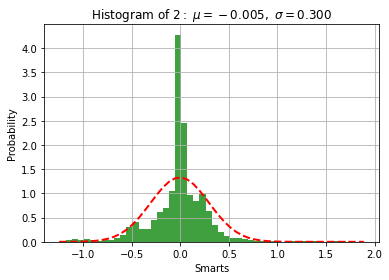

In [29]:
# best fit of data
(mu, sigma) = norm.fit(steerings_2_processed)

# the histogram of the data
n, bins, patches = plt.hist(steerings_2_processed, 50, density = True, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = norm.pdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

#plot
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ 2:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)

plt.show()

In [30]:
#validation data 20% of the dataset
#define the start and end
image_path = '/home/ai/Desktop/Rayne/research-FL-Rayne/Udacitydataset/Ch2_002/HMB_1/center_camera-image_color-compressed.csv'

In [31]:
image_csv = pd.read_csv(image_path)

In [32]:
def read_image_stamps(image_log):
    timestamps = defaultdict(list)
    for i in range(0,len(image_log['Time'])):
        second = float(image_log['Time'][i])
        timestamp = "%.1f" %second
        #image_id = "%.6f" %float(str(image_log['header.stamp.secs'][i]) + "." + str(image_log['header.stamp.nsecs'][i]))
        #image_id = "%.6f" %second
        image_id = "%.6f" %second
        timestamps[timestamp].append(image_id)
    return timestamps 

In [33]:
image_stamps = read_image_stamps(image_csv)

In [34]:
image_stamps_keys = list(image_stamps.keys())
start = image_stamps_keys[int(len(image_stamps_keys)*0.8)]
end = image_stamps_keys[-1]
len(image_stamps_keys[int(len(image_stamps_keys)*0.8):-1])

440

In [35]:
client_dataset_paths = ['/home/ai/Desktop/Rayne/research-FL-Rayne/Udacitydataset/Ch2_002/HMB_1',
                            '/home/ai/Desktop/Rayne/research-FL-Rayne/Udacitydataset/Ch2_002/HMB_2',
                            '/home/ai/Desktop/Rayne/research-FL-Rayne/Udacitydataset/Ch2_002/HMB_4',
                            '/home/ai/Desktop/Rayne/research-FL-Rayne/Udacitydataset/Ch2_002/HMB_6']
client_dataset_samples = [4401,15796,1974,7402]
    
clients = {'client1': {'client_dataset_paths':'/home/ai/Desktop/Rayne/research-FL-Rayne/Udacitydataset/Ch2_002/HMB_1', 'client_dataset_samples': 4401},
           'client2': {'client_dataset_paths':'/home/ai/Desktop/Rayne/research-FL-Rayne/Udacitydataset/Ch2_002/HMB_2', 'client_dataset_samples': 15796},
           'client3': {'client_dataset_paths':'/home/ai/Desktop/Rayne/research-FL-Rayne/Udacitydataset/Ch2_002/HMB_4', 'client_dataset_samples': 1974},
           'client4': {'client_dataset_paths':'/home/ai/Desktop/Rayne/research-FL-Rayne/Udacitydataset/Ch2_002/HMB_6', 'client_dataset_samples': 7402}}


In [8]:
for client in clients.keys():
    print(clients[client]['client_dataset_samples'])

4401
15796
1974
7402


In [4]:
test_4 = [0.24220139139588057, 0.24220804650297212, 0.2443579915502946, 0.24764709449635744, 0.25293725089721497, 0.25953763157234605, 0.26668605878249624, 0.2785189802488632, 0.2798882469500171, 0.28961274177429724, 0.31005170647675817, 0.31160071754146584, 0.31619140487663056, 0.32494696945136325, 0.3334096379421603, 0.3238895411113175, 0.34871525953672167, 0.342577229681138, 0.3538032842493476, 0.36112801725530513, 0.35936030538747366, 0.37018611977347504, 0.37757376759636135, 0.36372595926324286, 0.3518315110138313, 0.3410445573205778, 0.34060033070959733, 0.3577756990761163, 0.3334133727397859, 0.36104668827005676, 0.3572044868006232, 0.329260498638384, 0.3139594236256814, 0.30664063610774944, 0.31100043625747653, 0.3066796139276943, 0.3112395869890154, 0.31232818737883394, 0.3143968874046468, 0.2897586607548102, 0.3014749351034497, 0.30576545136416194, 0.3187805802042745, 0.29786543509657565, 0.2989533237223131, 0.2953646160891813, 0.2932816516792702]
test =  [0.4614508351292714, 0.46242454296869784, 0.46207168714029984, 0.46215483126559775, 0.4623343822945252, 0.4623787987696401, 0.46198407089609017, 0.46217508218880826, 0.4624426057881734, 0.46214003302446793, 0.4622736637800243, 0.4622446358360133, 0.4625409800601998, 0.46246983835534305, 0.46235668096782273, 0.4623383519493996, 0.4624928406398897, 0.46224304908151664, 0.46215550062521615, 0.4624755442668059, 0.46235256805909175, 0.4624860470491926, 0.46247718702931845, 0.4622651757388711]
number = []
for i in range(0,len(test_4)):
    number.append(i+1)
print(number)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]


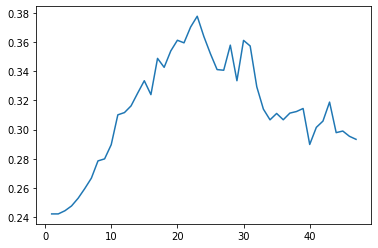

In [5]:
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
plt.plot(number, test_4)  

In [41]:
min_value = min(steerings_5_processed)

In [42]:
max_value = max(steerings_5_processed)

In [43]:
normalized_rmse = 0.46215681501491224/(max_value - min_value)

In [44]:
normalized_rmse

0.1440676517992458

In [45]:
normalized_rmse = []
for i in range(0,len(test)):
    normalized_rmse.append(test[i]/(max_value - min_value))


In [46]:
normalized_rmse

[0.14384757744128465,
 0.14415111034917905,
 0.14404111497754454,
 0.14406703340718446,
 0.14412300465823025,
 0.14413685055871922,
 0.14401380245903858,
 0.14407334620591192,
 0.14415674105265927,
 0.14406242036723554,
 0.1441040769403633,
 0.14409502809028826,
 0.14418740715972045,
 0.14416523023182343,
 0.1441299557999117,
 0.144124242114517,
 0.1441724007094903,
 0.14409453345299875,
 0.1440672420659455,
 0.14416700892952758,
 0.14412867368725277,
 0.1441702829506967,
 0.14416752102613625,
 0.14410143097233344]

In [1]:
rmse = [0.24243617033570672, 0.24309738692048302, 0.24767209790536976, 0.2502709643547751, 0.25451285597652923, 0.2577173448034308, 0.26169815612390795, 0.2704533978135709, 0.27512649966752073, 0.28678858383919514]

In [5]:
import numpy as np
val_loss = []
for i in range(0,len(rmse)):
    val_loss.append(rmse[i]**2)

In [8]:
val_loss
number = []
for i in range(0,len(val_loss)):
    number.append(i+1)
print(number)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


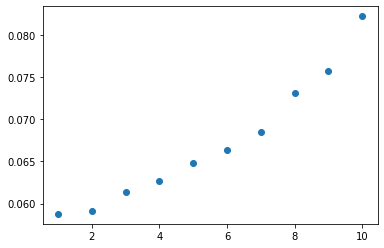

In [10]:
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
plt.scatter(number, val_loss)  

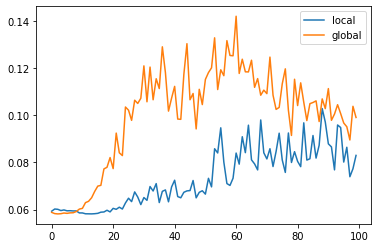

In [14]:
import numpy as np
import matplotlib.pyplot as plt
local_model =   [0.24359803252374773, 0.24548511389681904, 0.24523351385273187, 0.2441591261732651, 0.24469105975014765, 0.2439365639860991, 0.24402061678603718, 0.24380962967065795, 0.24385181631356623, 0.24209907994083962, 0.24208216735046928, 0.2413447856134353, 0.24130407882814495, 0.24125224186727115, 0.24141848106275385, 0.24173057219318148, 0.24274340233639877, 0.2429242021925611, 0.24442427678285453, 0.24299094145188008, 0.24604621384107814, 0.24522840778091032, 0.2470499689711561, 0.24548469734022016, 0.2506625867959501, 0.25463311971304936, 0.25178452647747285, 0.25980824338486086, 0.255601673619074, 0.24927076708282972, 0.25519033081541836, 0.25286093982664226, 0.26416959496752895, 0.2605447957437939, 0.2664948816100452, 0.25099015959510934, 0.2602763752131562, 0.26143088644444573, 0.2516382607551612, 0.2637877131766489, 0.2691753277294537, 0.2559903932631469, 0.2549877646211061, 0.25951070705358076, 0.2606475851704031, 0.2609163726927012, 0.26895179133433533, 0.25493303914308674, 0.25948144687563035, 0.2607669025295783, 0.25801732858876164, 0.2706677339883627, 0.2638906276784558, 0.2928860101695633, 0.2898144388045614, 0.30764095473858677, 0.2830838996217402, 0.2665294186901908, 0.2650468056223428, 0.2707640121568296, 0.2897488551462157, 0.28153766222411375, 0.3014424648161399, 0.2900412662171351, 0.30945007090013954, 0.28472822589233704, 0.28170792402624356, 0.2771640127092874, 0.3129943039976503, 0.28994467100805404, 0.28542569911572013, 0.29289863449844405, 0.2797270595805333, 0.2909311678780091, 0.3039202109256889, 0.2846507327062151, 0.2752354769643722, 0.3040657487107291, 0.28278805951939656, 0.2907565212416793, 0.2835991454699691, 0.27964251234969734, 0.31104957240636527, 0.2845832223240739, 0.28555279760963137, 0.3022968519501815, 0.28604812422025194, 0.2953410012617327, 0.3206046290208396, 0.31155851609844154, 0.296404415691068, 0.2942139352085363, 0.27719598020961467, 0.30956667930512866, 0.30785106559799974, 0.2830956784499384, 0.2939479355104464, 0.27191539943213106, 0.27806238044747006, 0.28802574814190907]





global_model = [0.24257688361842678, 0.24149262738746471, 0.24122694296724373, 0.2414208317548864, 0.24201198932960252, 0.24172578383540436, 0.24214229645242083, 0.24224414018076335, 0.24330398287004495, 0.24542240567318066, 0.24604303177224277, 0.2509243836899686, 0.2520580898265373, 0.25503496669648595, 0.2602395788983006, 0.264499875527258, 0.26512569670764036, 0.2779310836177217, 0.2791616324423205, 0.28644721283446234, 0.278157616682823, 0.3039819401288344, 0.2899417273476894, 0.287909234347689, 0.3216307726348045, 0.3195354278946199, 0.31273302350215143, 0.32606506499804805, 0.3239834685537298, 0.327350465336497, 0.34764824914819953, 0.32505342491775957, 0.34692345778915784, 0.3263718579606362, 0.33972856715367855, 0.3335649955851701, 0.35907080854975465, 0.3435177383535384, 0.318923274165418, 0.32736667705409134, 0.3349409357815776, 0.31360497592104825, 0.31342077010205216, 0.34248194569880563, 0.3609119194075672, 0.326386746828529, 0.33041044663464786, 0.30687406659908967, 0.33307917053042907, 0.32322912073317905, 0.33929992009731735, 0.3435460614915458, 0.34646459640087257, 0.36433148160086676, 0.33293008388778944, 0.34526308095278246, 0.3416299418846351, 0.3626933119926611, 0.3539319982954818, 0.35374956688258696, 0.37666291386974243, 0.3430181057736533, 0.35168668210456017, 0.3440147166347237, 0.343960575278569, 0.35107847559556465, 0.3343369401238485, 0.33981999978971184, 0.32930429282440377, 0.33256019304954243, 0.3303292390456386, 0.3529538358466086, 0.3293532656740873, 0.32006538509946497, 0.32136526916850455, 0.336522094568863, 0.34584426934549656, 0.3195586025022448, 0.3023362523383649, 0.3394063425478985, 0.32259138847556645, 0.3371612357333409, 0.32474787580848385, 0.31259014496587106, 0.32384205514953834, 0.32459113005834184, 0.32565070743015684, 0.3119294264644451, 0.32692063183963777, 0.3205767471975265, 0.333530181151763, 0.3127576978698583, 0.316977984225053, 0.3231474293500434, 0.3172733098933026, 0.31092829542661254, 0.3083728695902884, 0.2991563627686755, 0.3220961326196494, 0.3146727625678883]




x = []
loss_local = []
loss_global = []
for i in range(0,len(local_model)):
    x.append(i)
    loss_local.append(local_model[i]**2)
    loss_global.append(global_model[i]**2)
plt.plot(x,loss_local,label="local")
plt.plot(x,loss_global,label = "global")
plt.legend()
plt.show()

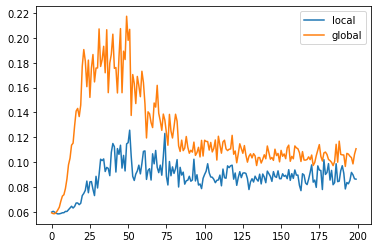

In [6]:
local_model =  [0.24424962155063498, 0.24562706812853727, 0.2440956729253337, 0.2422914722528384, 0.24127004438404775, 0.24145967601796675, 0.2420807028663613, 0.24317356166984783, 0.24330764687373557, 0.2454342692621695, 0.24532898321294, 0.2480793338663036, 0.25097706847862955, 0.2537329324225888, 0.25093143667664153, 0.2534411814763674, 0.2588320971167373, 0.2588953878978962, 0.25628121325630815, 0.2584353189613444, 0.27010838237352097, 0.2733939704848971, 0.27792439202148084, 0.2909870843608058, 0.27436956060182977, 0.28985429050712685, 0.2903013307307588, 0.27933215519500093, 0.2701548413050047, 0.2975004333270024, 0.2812574621275292, 0.2998282402578332, 0.31983436630032974, 0.31810381325965026, 0.3201722881365777, 0.3039599700367673, 0.30935782418942304, 0.3079866752605213, 0.2983948757983799, 0.32834313968984297, 0.33904886436391957, 0.33518134544092815, 0.30321178153763306, 0.3329471089527936, 0.3258786588346111, 0.33699735744428483, 0.3084191497145719, 0.3246132287641532, 0.30467703723202255, 0.3385664206763618, 0.3400372683378537, 0.35453009103088806, 0.3236474979909733, 0.2974608393559978, 0.2918376199693295, 0.3006118596490697, 0.3046741328577135, 0.3122488916443871, 0.3007895442451546, 0.31443655253707364, 0.32955551509447834, 0.3301229412270891, 0.2932823850827903, 0.3054176354212438, 0.3076639654899728, 0.2924040817424456, 0.3265945385299469, 0.31394405767652106, 0.33069735185869437, 0.30960792574525464, 0.30242834054729334, 0.31228792192188115, 0.2990073652189648, 0.32315372335895187, 0.3508630981103842, 0.2976069212031928, 0.2855272639674805, 0.3169519729759753, 0.2982691044608155, 0.31001912663922504, 0.30138582740208286, 0.30787300562482445, 0.3193257089495622, 0.282659768938025, 0.30941629155391925, 0.2991690695221759, 0.30311825423733046, 0.2866928637522079, 0.2914557532275174, 0.29212633587955245, 0.29757874888692615, 0.29076182404112516, 0.29249518108212785, 0.3197884718053634, 0.2911465473108472, 0.29963233026444963, 0.28541809233491694, 0.28695691111970395, 0.28035195315399125, 0.2947511602300129, 0.3000556151580846, 0.30437409195535897, 0.31409347475761007, 0.30220048148742396, 0.2965953978134973, 0.2962563727763045, 0.29347647852000036, 0.2887286457419224, 0.2920789911016072, 0.29248136470969743, 0.2991431426583144, 0.2843610747632674, 0.30718315740127866, 0.29558683180335404, 0.2948904657337422, 0.3113642539099604, 0.30901359836906467, 0.31146579622072024, 0.3122320460484085, 0.29364053956172537, 0.3019989237364315, 0.2850281874749947, 0.29585221983165166, 0.30372329225753425, 0.2957177639347943, 0.30182183327421985, 0.3021777702452465, 0.30144020493480905, 0.2943194781854399, 0.2790067485192535, 0.2899072479768141, 0.2941686456400017, 0.28968780236248254, 0.2976985426032202, 0.29360871416464773, 0.29091831408254987, 0.30035576765432587, 0.287020923196653, 0.30059608401512383, 0.2965571814764825, 0.28869635275091915, 0.30446648362538276, 0.30111472943196776, 0.2973586580851182, 0.2905829698324882, 0.3038045583268131, 0.29723330485382254, 0.2960325393233983, 0.3048333921734145, 0.294305283318111, 0.2942043127503048, 0.30091905646769157, 0.2974160365455883, 0.29887819258533416, 0.2942767074914341, 0.3063355791172531, 0.2919938280611582, 0.301143547010285, 0.2946873512382212, 0.3059799862551486, 0.2990671266398543, 0.29917356208808243, 0.2849949579198168, 0.27741249048071825, 0.3009540346279617, 0.29927893967478997, 0.2883526185329339, 0.28605226571822323, 0.29354216990910537, 0.3026350151286072, 0.31258667062917256, 0.289503252244202, 0.2923521604316754, 0.2821232056562084, 0.31132248392796, 0.30591467313520565, 0.30525337626269855, 0.27902602316562136, 0.3192451371505127, 0.300002514274825, 0.30256813610223315, 0.31425080934479444, 0.29233901127589745, 0.3054301212551813, 0.2858797805664252, 0.28881474517660727, 0.3141197895063608, 0.2901743129699422, 0.2908627456854385, 0.30498388455319697, 0.3115332846894206, 0.30170638723134324, 0.27986620410233964, 0.2889729368996468, 0.2871566439586142, 0.291858874310394, 0.30275485636349675, 0.2995781411785633, 0.2940721077569782, 0.2936084450964154]



global_model =  [0.24299409865051178, 0.24172630766935752, 0.2417116704022447, 0.24389783215949348, 0.2478052616485744, 0.252259697755805, 0.2617043406539976, 0.2693199279275995, 0.2714726621871496, 0.2805120613692017, 0.29410617863356836, 0.31262353589980246, 0.3210683460041431, 0.3370767102753216, 0.3395174790815894, 0.3594561155419774, 0.375618973533552, 0.3784447083563416, 0.36967445741296934, 0.38202793335580304, 0.4208442400758665, 0.43661983443126445, 0.4257750015378481, 0.40091915711752907, 0.4267786723752364, 0.3900007669947829, 0.4192823490948669, 0.4320165651737136, 0.4056809881907104, 0.4192240894836142, 0.41930286171041126, 0.4552836320149654, 0.42075855148025004, 0.4271623979316418, 0.4396236399098931, 0.41465751099045567, 0.4545476491729718, 0.39486540356666977, 0.42394889016133425, 0.4322379470569544, 0.45059390060462295, 0.41893659991853843, 0.41971547970475775, 0.3945673421529423, 0.4294718951846361, 0.45555048585209024, 0.39479971643763, 0.4351317025836349, 0.42731532391095395, 0.4663623655814419, 0.44505411913267756, 0.45490864241845885, 0.3708936821097086, 0.4129135901395055, 0.40421792276289176, 0.38359923456650524, 0.4110898780385168, 0.40194338278865743, 0.39073284749281184, 0.41613201930103977, 0.40500946584219866, 0.3832119088985095, 0.3455687322139575, 0.3748077501384476, 0.37270028721018295, 0.363000049528466, 0.3574667969892713, 0.38417638333493964, 0.3798574519721107, 0.4022608430232611, 0.3732350906442545, 0.3649809189774101, 0.35435746821627595, 0.37236917609563613, 0.3657493308712257, 0.3515601281083954, 0.33696088282096054, 0.37206448567648365, 0.35354545044906494, 0.3455336354750267, 0.35846566203327895, 0.3721993813928717, 0.36467915256633293, 0.33625777480278546, 0.3294731635381823, 0.34302834543303495, 0.3304435798655961, 0.33355490972121493, 0.3472571102027974, 0.33470512356152865, 0.32727984038087615, 0.33094499434393526, 0.32864182844407575, 0.34067772082451003, 0.3246153178583835, 0.3280182051642638, 0.33448668862362424, 0.32269535379828324, 0.3427599609930549, 0.32381694807751654, 0.3429375211185615, 0.34148940212415246, 0.34135635456991364, 0.33112964048030163, 0.3403177138827127, 0.3288696690014734, 0.33312427908901693, 0.3431995020494269, 0.3187659247566544, 0.347560550933498, 0.3372018011363255, 0.32735051151391814, 0.34088134267300924, 0.34291524592955086, 0.33262265623607173, 0.33050002612735213, 0.33211750966209436, 0.33251194633104064, 0.34859138881428836, 0.3260367310116104, 0.3300168784081114, 0.31532433348820393, 0.3266279917068628, 0.33870803179056, 0.33289649284132405, 0.32721129579485336, 0.3365729890685365, 0.32488970892911756, 0.3161043177056657, 0.32346940244465433, 0.3264840903501541, 0.3214490395484818, 0.3267307769470582, 0.3240375300275824, 0.3117644405623887, 0.3219160235777875, 0.32186864899422646, 0.31497364798593214, 0.31969859116925897, 0.3253919387118638, 0.3203995527951793, 0.33607167881210426, 0.3278753017238788, 0.31992141587211875, 0.3220436050204901, 0.3183723581027937, 0.3322068238695018, 0.3243841069243072, 0.327010991432442, 0.3165055024277896, 0.33077879483919354, 0.3234707723848426, 0.3264213828392901, 0.32050736181770634, 0.33393053559944974, 0.3370976971296538, 0.31721115325841176, 0.3233621309055006, 0.32039090514025087, 0.336120635477674, 0.33382126451584826, 0.3327317667673222, 0.32795160948906155, 0.3169725469978712, 0.32924942807172736, 0.318800688202134, 0.31871077444385193, 0.31947940263321983, 0.3227962721990882, 0.31930016200636074, 0.32504903922473255, 0.3118568741412681, 0.3156270373203343, 0.32429181893667086, 0.33113748851330377, 0.3377268646270078, 0.32346737068641007, 0.3175619433307016, 0.32766950267424316, 0.3287259156686636, 0.32581999670774436, 0.31951736230937183, 0.31801433038475796, 0.315864635087867, 0.31166167986702675, 0.3168571906254044, 0.3381292276242824, 0.3160720399121033, 0.34179669821174546, 0.3258397376124341, 0.32528690974527225, 0.32510160041458436, 0.31057501934512877, 0.32709046099697586, 0.32619614155911647, 0.3235772185241381, 0.321850040306837, 0.3138917357077889, 0.3259365180870742, 0.33275396081269637]



x = []
loss_local = []
loss_global = []
for i in range(0,len(local_model)):
    x.append(i)
    loss_local.append(local_model[i]**2)
    loss_global.append(global_model[i]**2)
plt.plot(x,loss_local,label="local")
plt.plot(x,loss_global,label = "global")
plt.legend()
plt.show()

In [9]:
clients = {'client1': {'client_dataset_paths':'/home/ai/Desktop/Rayne/research-FL-Rayne/Udacitydataset/Ch2_002/HMB_1', 'client_dataset_samples': 4401},
           'client2': {'client_dataset_paths':'/home/ai/Desktop/Rayne/research-FL-Rayne/Udacitydataset/Ch2_002/HMB_2', 'client_dataset_samples': 15796},
           'client3': {'client_dataset_paths':'/home/ai/Desktop/Rayne/research-FL-Rayne/Udacitydataset/Ch2_002/HMB_5', 'client_dataset_samples': 4235},
           'client4': {'client_dataset_paths':'/home/ai/Desktop/Rayne/research-FL-Rayne/Udacitydataset/Ch2_002/HMB_6', 'client_dataset_samples': 7402}}
   

In [10]:
client_model = {}
for client in clients:

    client_model[client] = 30

In [12]:
client_model['client1']

30

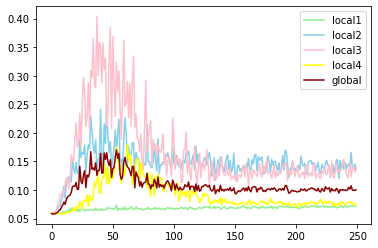

In [13]:
import numpy as np
import matplotlib.pyplot as plt
local_model1 = [0.24254448090860858, 0.24462136434704213, 0.24234105146709922, 0.24191418917758448, 0.2427832075642829, 0.24187657812215418, 0.24237485196711955, 0.24301141903545312, 0.2448562117607582, 0.2470686646349687, 0.2504219939105924, 0.24808663503263906, 0.2497952660072876, 0.2543559109030222, 0.24923524438773437, 0.2600276629606249, 0.2528514162108432, 0.26224894678026667, 0.2585413414327285, 0.256296419392763, 0.2547265286343582, 0.25079639038556245, 0.2573626449429183, 0.2508068517039675, 0.25703674345759103, 0.2589202608638883, 0.2566233712016546, 0.2512173149919276, 0.25419111675560746, 0.2550740594239071, 0.2536202296942767, 0.2567794291249565, 0.25777054114364456, 0.25426844448671515, 0.2556674576789797, 0.2544825755252113, 0.26129466904063536, 0.25390942723856536, 0.25533487366910135, 0.2574800442644436, 0.2536584010672046, 0.25898724414196905, 0.255314205143787, 0.2556517405365238, 0.2552301244399993, 0.26188119183552483, 0.25961668800251064, 0.263310843700619, 0.2601768514217922, 0.259840264253434, 0.2588365058914887, 0.25802329834983906, 0.25987717064792365, 0.2720519994560454, 0.25312426555682394, 0.2601588470298832, 0.2580896106754446, 0.2552754908320373, 0.2616665080083591, 0.2566708382070422, 0.26408138027703165, 0.25522829593437113, 0.2584970979216919, 0.2586568191988756, 0.2609319648815758, 0.2654850813592607, 0.26115623749637024, 0.2553749317611115, 0.2582847486403144, 0.26566924023757565, 0.26007429918789704, 0.2595850964908801, 0.25850066204142114, 0.2598795088678265, 0.25586501758177693, 0.2567654679537602, 0.2589854120563972, 0.25743878508723056, 0.2591128240073259, 0.26372230429688254, 0.25841982562957566, 0.25783520081847, 0.2573163765062273, 0.2578082716250542, 0.26375990444309416, 0.2581906528836418, 0.2623038629879143, 0.25788661424473164, 0.26137903676779256, 0.25737771561896816, 0.25689509464700305, 0.2609671363995247, 0.25817810438550837, 0.2565940490189117, 0.2611030699435351, 0.26264335613906087, 0.26149946818846065, 0.2599471980271634, 0.2599471126280103, 0.2611161136145322, 0.2573515324315728, 0.2589954675963643, 0.259338122581348, 0.2606625053859981, 0.2578986539094036, 0.26218435882242624, 0.26355206715502233, 0.2615179703828818, 0.2593768309066324, 0.26269740438954275, 0.2611804226286546, 0.2562596997244162, 0.25937643346083583, 0.2651955147179672, 0.2628690490398146, 0.2595895032188718, 0.26086326981995406, 0.25612887511209986, 0.2574259474373327, 0.26027279075879134, 0.2618113055440749, 0.2636848684344194, 0.2613255088384911, 0.2614863630092965, 0.2622517392320686, 0.26620983530192666, 0.2665509449931416, 0.26439832260244905, 0.2628259936765439, 0.26762388441261903, 0.2616136388100903, 0.26202135568851886, 0.2622008135653691, 0.2667793781411167, 0.2609746307378364, 0.2628865828602727, 0.26495394488546486, 0.26543093547416863, 0.2584709910817462, 0.25957829979375663, 0.26241363504093984, 0.26541541097036236, 0.26269026182459265, 0.2591728046383197, 0.2601849384975265, 0.2601342316936743, 0.2650012808278801, 0.2636809882531377, 0.26152997018374785, 0.2629229935894356, 0.25974218248987546, 0.26108259859294, 0.2629702598569042, 0.26126505784356263, 0.2633536628737051, 0.2638144701520332, 0.2663718787610037, 0.2691777888161536, 0.26404616542446124, 0.2659588503456683, 0.25981461207278334, 0.2647216261636036, 0.26128836398784605, 0.2603326503448552, 0.2632874429630482, 0.2667697092045621, 0.2676743589224349, 0.2644029720583403, 0.2622579661241225, 0.2627053354860505, 0.2593261236125613, 0.26701634080712744, 0.26293146599509537, 0.2659633212422177, 0.26392452386107923, 0.2606519555478216, 0.26511912179001934, 0.2630696505075516, 0.2653592119553207, 0.2625696252554896, 0.26770067767642014, 0.2598744222760082, 0.2638020079864689, 0.2667498957210812, 0.25944011923567734, 0.2633023420085554, 0.2679407473645377, 0.2681129585302361, 0.26513910349756015, 0.266978724601859, 0.26599868720182746, 0.26534582260753525, 0.264830862404734, 0.26996620322779985, 0.2645144770499794, 0.26343378599851935, 0.26470269081086967, 0.26280018684301026, 0.2649001138242375, 0.264267334362997, 0.26492779416547113, 0.2612217611985824, 0.2625081349085533, 0.25921242389232585, 0.2672852576293673, 0.266059352704029, 0.2636103464483507, 0.26826749078295414, 0.2673590113110086, 0.26386768952686673, 0.2648941364553444, 0.26665179271018574, 0.26804164834014615, 0.2690362261590218, 0.26788604347364514, 0.2669167567022949, 0.26971483776470584, 0.2630140204330231, 0.2674469081028032, 0.26451504457958835, 0.26729223287647635, 0.26709620455168637, 0.26872371794529876, 0.26449057759743766, 0.26811056568198477, 0.2672865517141917, 0.2630671348858179, 0.2661857483311816, 0.26444715081053366, 0.2652944972381699, 0.2667270541337563, 0.2647141979035505, 0.2661902094218742, 0.2617679549241553, 0.26495227935317034, 0.2645250641799304, 0.26690192405579405, 0.26891676548594134, 0.2635800209082832, 0.2655804687001995, 0.26811760058729467, 0.2674504802268665, 0.2625379622529901, 0.26832767310861166, 0.26757132815368184, 0.26877913602358244, 0.269789206062892, 0.2672710964148171, 0.2682045202081629, 0.26724540802215835]
local_model2 = [0.24128260951757954, 0.24441034809691914, 0.2446376754696755, 0.24792341773748997, 0.2555664915187998, 0.25922612323809785, 0.26982936617973685, 0.26947298483605775, 0.2893363398216844, 0.29681232010563485, 0.3262857378958941, 0.2929542680344651, 0.33532657299556945, 0.3391821218931817, 0.35013850899831317, 0.3445072841562711, 0.33773645879491715, 0.39118068684383117, 0.3711540550360039, 0.3595647547343279, 0.3852091475094585, 0.358433040648286, 0.3584490180015492, 0.433447944874899, 0.3959523170095935, 0.40688844605859437, 0.4036430241364402, 0.42289274542986177, 0.3638733111265348, 0.4003981989689634, 0.4235073399214684, 0.41488206277554607, 0.4785175890468988, 0.4478270257640629, 0.41946905483617414, 0.40541379582802844, 0.43346282367975053, 0.3626712040191771, 0.3924867336980709, 0.39402575916333527, 0.49110001419738025, 0.38945451928634994, 0.3762815162475218, 0.4638591500562223, 0.4254206414456569, 0.5026478687746778, 0.4398658789051635, 0.40617195554073304, 0.4297473244823011, 0.3706997011991203, 0.3952495492596883, 0.41371219886355576, 0.4523393979145697, 0.41053500084121786, 0.4446666329508829, 0.47266135558966743, 0.3870413102333735, 0.3935753750982422, 0.3700300319487879, 0.4364960572029579, 0.47536725996402857, 0.4440241509520897, 0.3802401177618356, 0.41923321182956536, 0.39214308946200704, 0.40437018128671565, 0.42788641851055126, 0.42635362957879175, 0.3440170168825366, 0.40661807962081653, 0.3957911785963281, 0.3947345964475956, 0.36607740947238515, 0.3848869846037148, 0.3673445768616517, 0.3866490354758482, 0.37873777123105545, 0.3819298019935497, 0.4629031993057303, 0.3863009832874666, 0.3871226093222222, 0.3754387140450047, 0.3724788682909832, 0.3880148577901195, 0.42119277906035424, 0.386659497067346, 0.36559460409454614, 0.43531301153037405, 0.3595497092469816, 0.379265199382488, 0.37872692950773057, 0.3860309152739233, 0.38458294508779833, 0.40421288579185966, 0.397206151955466, 0.40634517130262543, 0.39269727334924187, 0.37666485652550546, 0.37295569900214437, 0.41970847975136394, 0.3833009075354975, 0.3768940710788096, 0.4011148709301815, 0.38173602220891634, 0.3784227800418877, 0.3747131089951086, 0.369053369261092, 0.3893697777733491, 0.38958059047042076, 0.384024452271007, 0.4067635298191399, 0.40277860964472106, 0.4105023230854855, 0.38315489451028434, 0.3813701550824894, 0.3927289689313663, 0.40327323733821335, 0.36639868886288285, 0.42003519410605994, 0.3853920294054108, 0.40315975449831926, 0.37772540912505714, 0.3830485930154189, 0.37663147142185754, 0.384397895659789, 0.39637381425151286, 0.3928221255071599, 0.3792829781690959, 0.3979474106433469, 0.4069289248701451, 0.3891474466848895, 0.35304267515851817, 0.3699643761208543, 0.3960238996140206, 0.34240170536015035, 0.36627719639983425, 0.39128167690780946, 0.3567493003498374, 0.39815675989802085, 0.37681830167383007, 0.3747140554832859, 0.3626622718800258, 0.379420918304502, 0.3971639910154376, 0.40157701141271795, 0.36831780105364553, 0.3893662890926236, 0.36279593296219054, 0.3706051210138416, 0.40529180532192743, 0.35460311540095174, 0.34052552155121435, 0.37596381279773544, 0.37879927665851326, 0.3645740788613203, 0.37110055338598535, 0.366739982454361, 0.3777486806253476, 0.37215792782641105, 0.3753777971138722, 0.373042375149041, 0.3940572198773847, 0.3664432798391848, 0.36561695507853653, 0.3912317222009937, 0.3824949879834309, 0.40149473568744376, 0.4031461239891854, 0.3649759689486729, 0.39842252494185176, 0.38964578293272695, 0.3951080158699536, 0.3970388688241264, 0.35619823534256045, 0.37287734851774973, 0.360860830613692, 0.3828749331593769, 0.3992800542157383, 0.38380682175701675, 0.36131438301135177, 0.39173963838875264, 0.37909795761893783, 0.387604979374765, 0.38659097068609016, 0.3738393973729575, 0.3660804701010143, 0.38423967624102, 0.3593021793912185, 0.3713697959784862, 0.4007684211982221, 0.36716113461351196, 0.411599273117907, 0.40853361154063067, 0.3802164796085894, 0.34927326711431145, 0.36906322557957033, 0.3737079255924366, 0.3864116733628382, 0.3685501887037434, 0.37155117844473284, 0.3644752597086059, 0.3660566718352679, 0.37767917382038146, 0.3683376513348175, 0.39948874331623824, 0.3806157149931607, 0.37693312994830824, 0.38294859622244526, 0.3559936834411499, 0.3608489982554491, 0.38653558455095044, 0.38814935933342876, 0.3896107124876146, 0.38102556851259867, 0.3846731081076734, 0.38243024140329523, 0.3635695939572687, 0.3760576534734975, 0.3856279672913016, 0.3629818958830229, 0.35803493726225194, 0.38037263265780613, 0.3746577002796739, 0.36519697407335255, 0.3817695549476021, 0.3897634648698324, 0.37852340926565464, 0.3772560218446112, 0.35301467143116555, 0.37350780158331215, 0.38085428981677094, 0.35936325979621414, 0.3735428490090647, 0.39137838835255534, 0.38963937311055036, 0.34620788532654884, 0.3895143957483427, 0.3686718702142194, 0.3848772004304458, 0.36964640715926256, 0.3852413545275316, 0.3694216723323729, 0.3796828236513852, 0.38115149425122347, 0.36963221242169136, 0.4073826663585485, 0.3722471849115335, 0.3706596376816483, 0.3817330893587495, 0.3692992137557304]
local_model3 = [0.24176136444503524, 0.2419482991522198, 0.24266265381369106, 0.25047859325695765, 0.25601311608534866, 0.2763226603027285, 0.2807379864855843, 0.30371084803391946, 0.29960592023513427, 0.3131862980048069, 0.3069815399260429, 0.33134379350450216, 0.34541477415247357, 0.3499526496420266, 0.3176882880478607, 0.34295485745000176, 0.4024992755439164, 0.3892382766358991, 0.38851299500120107, 0.4339019627199443, 0.46618115707410646, 0.41817534926673744, 0.42932664716811403, 0.48382193688579467, 0.4201436356195011, 0.4938563992766362, 0.5452571887004051, 0.5199151109928558, 0.45950801785241907, 0.4774686429404108, 0.5356718725460057, 0.4539356199509802, 0.5553515031227907, 0.545714938359497, 0.6045565722639188, 0.5303179007120854, 0.5283928473965367, 0.6356498041600067, 0.5479951448379511, 0.5986401772192304, 0.5943222444009695, 0.5362127603821347, 0.597558915952454, 0.5572061090890235, 0.5743423976001939, 0.4607026025170616, 0.4823251469829086, 0.5789622227832893, 0.6203017482908448, 0.45545580443842526, 0.6068878360379533, 0.5385105727861533, 0.4791049879989546, 0.568816841767482, 0.5226598774849602, 0.5556133535788307, 0.4923017396789851, 0.4344763139178282, 0.51235940978111, 0.6017371659551481, 0.4963799955803814, 0.5033702156327126, 0.538313505249769, 0.4756450858174838, 0.5361719618110461, 0.45970723318192186, 0.5348546187972594, 0.5773961497925593, 0.458694956911006, 0.48255723404616757, 0.43563070246805485, 0.4342948778523574, 0.40818943645419115, 0.44415303071145673, 0.3832676752685422, 0.36880808372997914, 0.4584816398135702, 0.5405594439586828, 0.40724245045095336, 0.4377467517294747, 0.45504023733779814, 0.4698291029274335, 0.37916121286819643, 0.434378678226842, 0.41296437513824374, 0.4258460034697424, 0.3998744180756581, 0.42261808990025385, 0.4120931292030198, 0.4076987091819342, 0.41504408776997215, 0.4452456827683232, 0.3800220209534497, 0.40294254164519355, 0.3548151749437994, 0.3906395969131205, 0.39601889503224075, 0.3888521064741295, 0.35223461242443055, 0.4748915347854358, 0.43455468281665766, 0.37026906919623526, 0.38444485039375514, 0.40050567999661707, 0.38117223009406725, 0.3932328429093448, 0.33556124453147834, 0.33919702948931213, 0.4122086099617993, 0.4111405890968308, 0.44880905682758027, 0.35990159523788184, 0.39036474644074326, 0.3652851229424807, 0.3426420290350938, 0.3858043133287318, 0.38232279121090784, 0.4212933487528031, 0.34999946851846436, 0.3322991649748362, 0.37804693337941553, 0.40585499469746356, 0.34890179230051177, 0.3766547155611921, 0.38555727665602096, 0.3673088698319058, 0.3823980354698096, 0.41301498682071425, 0.38156583013806444, 0.33056027844767766, 0.36101260858562645, 0.3882087172402934, 0.36235540487952844, 0.34085093235665914, 0.35818331251325397, 0.3465401822295203, 0.3820161950326568, 0.3530009492996185, 0.37375153417830603, 0.3969038989075421, 0.36514985972062836, 0.3552395089140113, 0.35363245408850963, 0.3818539711478794, 0.3616143152074326, 0.35368444685855777, 0.3702398947189506, 0.34407954994241385, 0.34919880382308927, 0.3539828277123826, 0.34232923557209505, 0.35672184510693455, 0.3383287561475086, 0.3548786003494292, 0.35446615179843116, 0.34938237124270394, 0.3748521522562204, 0.37296684288660725, 0.3517815177860978, 0.38317486170502985, 0.36823214813957955, 0.32734925153661587, 0.36847070530518866, 0.36142947043795515, 0.34677477169104476, 0.3687525427105924, 0.36095234802457044, 0.35835703822492165, 0.3517314119194807, 0.36730698086241137, 0.38396769678538933, 0.35738185860727895, 0.3503778420043258, 0.37868445594881034, 0.357035106461172, 0.3787494252199529, 0.3910172231211087, 0.35979850658499, 0.36182256005520186, 0.36132619447235526, 0.34721527003776476, 0.3616341843045273, 0.38007524613186927, 0.3478117754865701, 0.3640269557766217, 0.3526511399898656, 0.3620777990605018, 0.3608948496993131, 0.37428317465448774, 0.37187534571895287, 0.38182658107264056, 0.379336470218411, 0.38443947121654787, 0.34193327104508087, 0.3665866265691091, 0.3565301481859432, 0.3553586677908499, 0.3894777724911898, 0.36814602460343887, 0.3515933928982342, 0.36327215717878114, 0.3782679364942747, 0.35125321656375863, 0.34978610931237647, 0.35914295992862005, 0.3574378136148702, 0.363403611069975, 0.34598956779286993, 0.3778577705764288, 0.3798921461977445, 0.35245357436616814, 0.35651964710487793, 0.3610302666872151, 0.3523614948831401, 0.37800258350918087, 0.3819142321899938, 0.3467412443540315, 0.3573630477788953, 0.3592713324634204, 0.3500604846751759, 0.3457922954647086, 0.3655592398568514, 0.35876569990822466, 0.37411796410926956, 0.3580639364000788, 0.35562550455004294, 0.36581801817536297, 0.3781041083748535, 0.3482022795014837, 0.3884316869380102, 0.35264525357037074, 0.3473237337338695, 0.3636477867946088, 0.3800133720641233, 0.3604078893119393, 0.36708387688489263, 0.36360516840476426, 0.36871401689297567, 0.3843293870512249, 0.3916524979152313, 0.36925370546027975, 0.3593297589779069, 0.3478932498012388, 0.3609174107216746, 0.3841661291631541, 0.35111318259881086, 0.36991688475114537, 0.37670734071042833, 0.36219547455876355, 0.36752291151870814]
local_model4 = [0.24304527912054097, 0.24587619121997395, 0.24324397423916447, 0.2435505220844125, 0.2422865281383683, 0.24198250606724334, 0.24143453779765342, 0.24160021787803407, 0.24200342639478054, 0.24279378124691872, 0.24274313647361692, 0.24366536935265523, 0.2439408998095694, 0.2483019347559141, 0.2473562069738336, 0.24704136118757444, 0.2521300191064187, 0.2505654507569635, 0.26202135949035404, 0.25415194463889956, 0.2690832942457727, 0.2590477325963661, 0.2620503935156504, 0.28175870997380215, 0.28055726722063923, 0.25766541890096395, 0.28280212815886796, 0.2868191774474239, 0.2821083866463009, 0.30308768035088784, 0.26818553522843885, 0.3006148162397173, 0.2941942349990414, 0.28380456926264, 0.297786413781419, 0.3366468420346745, 0.3238384183000219, 0.3412849251994903, 0.3584047259551527, 0.30766772633707373, 0.3082920278440826, 0.34069114596237476, 0.3515957296520663, 0.3511155198648423, 0.3802932347472906, 0.33400862065654857, 0.37294839145869935, 0.3311893631690002, 0.35137193941209244, 0.3696739087299292, 0.3462168318799861, 0.35931856325805656, 0.3825766272132937, 0.4181518866838224, 0.4121503952678496, 0.3665927445148586, 0.3816861438294465, 0.33497130181958645, 0.35841892766764094, 0.3693842392137464, 0.35543306585769624, 0.3960344939921119, 0.42430643496577214, 0.3882689469691949, 0.4035493004561973, 0.38916840811058345, 0.33001698542835095, 0.35566941969202365, 0.35825452954935816, 0.39145886210574055, 0.392863587448776, 0.38998644535105637, 0.33716382934976497, 0.3839558057121501, 0.36529617532415115, 0.3559382897115088, 0.3519030139563049, 0.34771977873132964, 0.32300166032581284, 0.3613029293011041, 0.3169320233136661, 0.2981541745096023, 0.3587224603331608, 0.33282980998427064, 0.2994658037379437, 0.3506467135227225, 0.34507375714470084, 0.3573455723912859, 0.3415122200406507, 0.348107697337108, 0.3453495684124917, 0.31283193605368237, 0.3142227557295182, 0.332456056932708, 0.3351105337010667, 0.33157929945590486, 0.32433059050886237, 0.330304300727456, 0.33268796600161854, 0.3234499720242873, 0.3265442769650605, 0.3005917973566745, 0.3255700060941908, 0.3345397755681648, 0.2838414228864015, 0.2990211300667694, 0.32102973749745983, 0.30212964897330125, 0.3052511474096147, 0.3125084608147242, 0.2947360397391415, 0.3142360342670508, 0.3103600074582617, 0.2834389022251187, 0.3126945013317831, 0.31359774610444635, 0.3021530289117232, 0.32136612108589274, 0.3085453002204078, 0.2965813679958532, 0.29355696420362887, 0.2783428614994773, 0.2882210491139512, 0.2932934482658019, 0.30738967580871757, 0.2986946057815876, 0.3048645306499119, 0.30338484549777034, 0.29902273346073205, 0.28222031110241497, 0.27337354268413994, 0.28241420782765536, 0.27760616460913734, 0.28813319202710796, 0.2813148607655338, 0.28652191720794723, 0.2793535615882041, 0.2807660310682828, 0.2940113246828747, 0.2711699303838158, 0.29021003191295863, 0.28186577374188776, 0.2907532173780603, 0.27774993974766476, 0.2781376892175269, 0.28029835980522194, 0.28201060215842894, 0.27668577778520725, 0.2806269054050174, 0.2736904216207308, 0.2776083006249292, 0.2752151285985196, 0.2694594367567329, 0.27335347370526714, 0.2779516176473025, 0.2759430798740806, 0.2798615853119601, 0.2773458926227754, 0.2736726215294066, 0.27514534268080243, 0.2734395105457007, 0.2869703357513145, 0.2852000788856554, 0.2719257663653368, 0.27892696153314855, 0.2810744244495695, 0.27815793979752046, 0.27501013056996976, 0.2725808190735779, 0.27174750479307114, 0.27920849335773806, 0.28481645586843873, 0.28287004668664883, 0.2810239139277788, 0.28313137311974057, 0.275691699037374, 0.27771847322161203, 0.2716075117400213, 0.2821784548585211, 0.2924870619072352, 0.28010590452773676, 0.28217603612845304, 0.2783933050146373, 0.2756658111192176, 0.2774836762901917, 0.28075275560293134, 0.279149116124519, 0.2833840841018278, 0.28096760141665095, 0.2709610332585614, 0.27831945001682645, 0.27259448268411984, 0.27478962112602745, 0.2770841626055094, 0.2792488359372518, 0.2696721790004447, 0.2696812150015731, 0.27453539986642334, 0.27173186063216087, 0.2750127041906991, 0.2697278180777315, 0.26367990470734837, 0.27514477927052594, 0.27706564221646746, 0.26808291855629957, 0.27390897199329, 0.2759826826985942, 0.27900691804154554, 0.26934787987566466, 0.2774515182533196, 0.2767235846675853, 0.27723679750786445, 0.2808393406186759, 0.28139947308069185, 0.2812097875015182, 0.27347544386597145, 0.27771213180645793, 0.2755826721645296, 0.27711763846290255, 0.2802656945159151, 0.2897219875955667, 0.2822506051317485, 0.27462157842884816, 0.2807943392531152, 0.28406477978590094, 0.2752604046075926, 0.2817639182913463, 0.2809122026537882, 0.2824204322382408, 0.2791683643792705, 0.270794296841037, 0.2789003442741783, 0.26787155839865767, 0.2750336982569674, 0.270128169549217, 0.27723056377783595, 0.27230456472230113, 0.2829835596463637, 0.2791759740135536, 0.2772419708836272, 0.2712748111249346, 0.27758225756557225, 0.277857264529782, 0.28045419140815736, 0.2789207492131893, 0.28297450723892337, 0.2752618645362073, 0.27438122241309665, 0.27653613935052024, 0.27324446960152926]

global_model = [0.24244700023517043, 0.24119091855959648, 0.24144771415451066, 0.24229743073468935, 0.2449157058485582, 0.2471693932703467, 0.25340700843454345, 0.25536237383951466, 0.2643136957377518, 0.2712824907566349, 0.2807008955676922, 0.2737240048627162, 0.28868692117551137, 0.29702286798476635, 0.2991844224730603, 0.30176776408494976, 0.3093275287671289, 0.32537003610726933, 0.32705447864962506, 0.3259666308806635, 0.3363306867800808, 0.31734033711209475, 0.3188613734184957, 0.37589023336805377, 0.3394399811529988, 0.3332406976866478, 0.3543209260746863, 0.3657655882820866, 0.3226352926539625, 0.35515623652043743, 0.3505382643721853, 0.3601457643602452, 0.40875358503563397, 0.36935735192891217, 0.3721535940133447, 0.3670600020577887, 0.384211984673597, 0.35443031978599715, 0.3665388349869659, 0.3668387703330415, 0.40505451817205285, 0.3601950605698338, 0.3601641951396795, 0.40586322694103544, 0.39182887019030366, 0.40630602756044365, 0.38755334540423636, 0.37761314818862235, 0.39110895251998046, 0.3493301970800619, 0.37031233856035073, 0.3733887328618237, 0.39656249633408014, 0.4124589083574937, 0.3940990591717274, 0.40517994526500073, 0.3564767730536956, 0.344398542011448, 0.35130040971760546, 0.3861516530755604, 0.3964695185797478, 0.3812092479741228, 0.3747540338595002, 0.37177461201538897, 0.3644666062235611, 0.3533783532977513, 0.3758233123222757, 0.3751301871156166, 0.322069487497574, 0.3627500680198078, 0.35454044452604905, 0.3479763993638781, 0.32701917199018093, 0.33838377956947185, 0.3238336373217366, 0.33475112756811737, 0.3359733285108808, 0.3380327861014901, 0.3594473386338673, 0.3321399839820332, 0.33176176795024986, 0.31951941531130246, 0.33018906217819616, 0.32661352942780414, 0.34448896157150594, 0.33722702674131627, 0.32176187176027876, 0.3504720408288975, 0.3241800053239326, 0.33134067261062805, 0.32609335327115635, 0.32950725998363994, 0.3212076826986119, 0.3312666792982883, 0.33833440817781313, 0.3407888729270376, 0.3345742509868421, 0.3268963747264024, 0.3137383113981878, 0.3426531267624111, 0.3318328303151095, 0.3165999488240555, 0.3323382709349035, 0.3224852449421058, 0.3157159045033282, 0.32379413927989015, 0.3177201030539015, 0.3168008110152035, 0.31998192952269444, 0.3305386591577785, 0.32718057035665765, 0.3251895806894045, 0.3377450597116424, 0.3169284208615848, 0.3266162036908179, 0.3260404660829143, 0.32603004694325327, 0.3117603973766755, 0.3323487352861845, 0.3151413427593433, 0.32861574661951654, 0.31285702424534895, 0.3157055711547764, 0.3261402437897283, 0.32546616128884504, 0.32957931399003176, 0.33050050384565366, 0.32710803464383137, 0.32476475106341923, 0.32883362991151777, 0.3176529130514365, 0.31332869048824064, 0.31566424650182295, 0.32843089863910324, 0.30597629051524194, 0.3141557503770692, 0.3178592379245902, 0.31145480549150906, 0.32895565261151455, 0.3146760333254101, 0.3181265196660757, 0.31333632891011387, 0.31795339984878107, 0.31588850974003163, 0.31926137495901197, 0.31573354143645826, 0.32294669953654914, 0.31397326461243535, 0.3154101780273935, 0.322017079324558, 0.3066736582023687, 0.3056042067561978, 0.3114096044971403, 0.3142876455307074, 0.3115527719247739, 0.3145986440559236, 0.31853219522051424, 0.321937738201732, 0.313547938676545, 0.32136086022622484, 0.3141101461059066, 0.3253909460063282, 0.3159370981180595, 0.3113078465555872, 0.323131626775445, 0.32463690793420596, 0.3256631705602688, 0.32363603360640525, 0.31085761143644997, 0.3200525669630116, 0.3179718891901861, 0.323838179097676, 0.32101529407196366, 0.31263460872506954, 0.31488537684856577, 0.3118564899941544, 0.31818551799944217, 0.31902982970309035, 0.31877537739899037, 0.3162847036231995, 0.3209107284919518, 0.31822293754606096, 0.3220638957452712, 0.31869237836595093, 0.3130888984010121, 0.314270387834076, 0.31923305355058895, 0.3189327395748846, 0.31558226952128554, 0.32054914407416557, 0.31578129382790615, 0.3278411207633901, 0.32864129702343164, 0.3181993403843129, 0.3073728252371237, 0.30881914580190784, 0.31360959577055303, 0.31535085882056535, 0.31284051573220995, 0.31366690917856915, 0.3118287788142089, 0.310659113886227, 0.3124186465700745, 0.31218729468987755, 0.3191989880564859, 0.31658395853885857, 0.31559372987857653, 0.31948223684476235, 0.3134701074362536, 0.3146210720596661, 0.3182360381032798, 0.31879453899032356, 0.3211221358683647, 0.32198419243888227, 0.3191077435848246, 0.3193462435969328, 0.3150850688731092, 0.314207105810963, 0.3208931517100368, 0.3123647204555769, 0.3106722272919118, 0.32012748683288733, 0.3168539562806433, 0.31281730483101955, 0.32529521417285046, 0.3199831163416225, 0.3195076879058672, 0.3224953705935576, 0.3104614276573744, 0.32020836450240675, 0.3145596276720294, 0.31562169876513496, 0.31380144968592993, 0.3208067458613791, 0.316667739228196, 0.307774050389832, 0.31705069937342906, 0.316224759344589, 0.31719832801799513, 0.31552514109281454, 0.3163426694170362, 0.3147579273120885, 0.3160341735277915, 0.32341298100953525, 0.3188211456613554, 0.32768175435407365, 0.31575271163782936, 0.31584110870061605, 0.31510932767152566, 0.3166519729380156]


x = []
loss_local1 = []
loss_local2 = []
loss_local3 = []
loss_local4 = []
loss_global = []
for i in range(0,len(local_model1)):
    x.append(i)
    loss_local1.append(local_model1[i]**2)
    loss_local2.append(local_model2[i]**2)
    loss_local3.append(local_model3[i]**2)
    loss_local4.append(local_model4[i]**2)
    loss_global.append(global_model[i]**2)
plt.plot(x,loss_local1,label="local1",c="lightgreen")
plt.plot(x,loss_local2,label="local2",c="skyblue")
plt.plot(x,loss_local3,label="local3",c="pink")
plt.plot(x,loss_local4,label="local4",c="yellow")
plt.plot(x,loss_global,label = "global",c="darkred")
plt.legend()
plt.show()

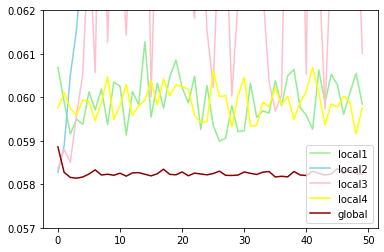

In [13]:
#global account never changed, simply change local model1 and local model 4 scaling factor == 0
import numpy as np
import matplotlib.pyplot as plt
local_model1 = [0.24634735118196419, 0.2447474043953008, 0.24321653934330068, 0.24392333327790178, 0.2436800738412007, 0.24520666758316237, 0.24435964320674486, 0.24533935276617028, 0.24366967795699251, 0.24566521105997152, 0.2454713451652283, 0.24318109477947217, 0.24522198090421016, 0.2446121491906197, 0.24754960324762146, 0.2440204737579021, 0.24561329957734926, 0.24444480455646758, 0.24589998358717452, 0.24669869805304662, 0.24541081989332403, 0.2446880834436824, 0.24593148209638233, 0.24343984796349669, 0.24550241525808866, 0.24363368508162891, 0.2428819169733727, 0.24302606002605356, 0.2445522525424727, 0.2433347213983149, 0.24337883332645377, 0.24561716514098908, 0.244011989079045, 0.24431152887030913, 0.2442064301465898, 0.24573597416533705, 0.2445474220843363, 0.2459615740378583, 0.24624602616136657, 0.2444641997721884, 0.24410223354118257, 0.24344392978121282, 0.2462221960140014, 0.24470021923664237, 0.24603548240363896, 0.24552826039543987, 0.24415289989803762, 0.2451557272425598, 0.2460689655157929, 0.24463282589262275]
local_model2 = [0.24139501041773825, 0.24266012951374613, 0.24599400930701704, 0.24811959683320298, 0.25154895305694636, 0.27824327808404714, 0.2929048159980151, 0.28103893468483937, 0.2791206946923208, 0.2790684989442445, 0.31599854153540835, 0.2696218169992366, 0.29163714740244984, 0.2897884245183154, 0.2813013673533493, 0.2679648507984359, 0.28680873396140283, 0.3104644928732739, 0.2698850723843714, 0.27975228281338904, 0.3188122494957915, 0.26959495289117197, 0.2925473966842049, 0.27724184732142454, 0.28368898172050727, 0.28636370313120124, 0.2990120565481847, 0.27531274827548, 0.2795233349957249, 0.26542702317233635, 0.2874680658038959, 0.29212683590514377, 0.2784035005105305, 0.30135698961274426, 0.3022387998855672, 0.26315257957374133, 0.2704719852175672, 0.2581083166925892, 0.3070384996466479, 0.2740390368533264, 0.2733423070478054, 0.2935119732199548, 0.28852399742586005, 0.27248265129430066, 0.28003823848227377, 0.3247189802796294, 0.28738030959097305, 0.323293190504422, 0.2904777329400423, 0.285920179774954]
local_model3 = [0.24157203983760914, 0.24249088602813018, 0.241875627427595, 0.24412457084384165, 0.2460415766257829, 0.2523829022386106, 0.24610336055272847, 0.2605929596609737, 0.24751086982820253, 0.2558628747615398, 0.2529804740318624, 0.24784996821659974, 0.2550062074470991, 0.2539141709772309, 0.26289620047217965, 0.24496672881312176, 0.2552249353805888, 0.24921231010225472, 0.2508022037116801, 0.2514894780219259, 0.25775453070170184, 0.25071628199239876, 0.2486384148762937, 0.2547271143975515, 0.24807112634450473, 0.24541514556422162, 0.2531909827650654, 0.25289432774656373, 0.24501935873021197, 0.2494778118559074, 0.2527875795356475, 0.25244435957801087, 0.2586902900367357, 0.2498528790328254, 0.2456696469051885, 0.24430293380895157, 0.24504417642401372, 0.2593140391502635, 0.25274697238888316, 0.2580283766421231, 0.24602543886277037, 0.27269371081072025, 0.25118689266455513, 0.24440543602718934, 0.25163267533763933, 0.26139709000783523, 0.2499140183660133, 0.25805154951613446, 0.2550505023894039, 0.24700327431917593]
local_model4 = [0.2444557024289674, 0.24517601371512263, 0.24442008846962662, 0.2441158240367421, 0.2448245777163429, 0.2447511498736381, 0.24384836915866534, 0.24471910867614186, 0.2459263633455201, 0.2439086033502343, 0.24455784035935865, 0.24554758546880087, 0.2440995126341605, 0.2445555238962126, 0.24479451021673196, 0.2457248291353074, 0.2446093958133654, 0.24581561873422939, 0.24502700764875981, 0.24552603222671324, 0.24546364468339932, 0.24532036709663751, 0.24410044727745023, 0.24377422617887834, 0.2438049390087167, 0.24620751656363704, 0.24497590453219184, 0.2450361045674611, 0.24356260829167858, 0.245040268682488, 0.2458985504731622, 0.24358758966445204, 0.24363786731346151, 0.2447218507568003, 0.2445077452177057, 0.24540259847475349, 0.24459644284181556, 0.24499037424617473, 0.2439180537178052, 0.24471381409149087, 0.24524192519921287, 0.24634458312763508, 0.24517383958468278, 0.24364869027677424, 0.24464836331356032, 0.24448281916494358, 0.24500835373045013, 0.24471816820103118, 0.2432297128325164, 0.24446436509097344]

global_model =  [0.24261152802731467, 0.24140153925300992, 0.24116122534926346, 0.24112388554442427, 0.2411802928517218, 0.2413234027199545, 0.24152071298897654, 0.2412758522160521, 0.2413119718086814, 0.24126346355560602, 0.2413609943752605, 0.24122130989324841, 0.2413761182044043, 0.24138904104248787, 0.24131129904848675, 0.24123550003468602, 0.24133463753074125, 0.24155103555024385, 0.2413060032170103, 0.24128491180940204, 0.24142082422255698, 0.2412398541096442, 0.2413658180303149, 0.241324418465569, 0.24128391285826153, 0.2413453722742778, 0.24145937091704506, 0.24126100642056533, 0.2412542944569498, 0.2412726698888005, 0.24142048281292808, 0.2413559332757746, 0.24130032368077922, 0.24141323764808276, 0.24144022877176421, 0.2411805491521267, 0.24121560428466363, 0.24118895912373772, 0.2414427221875841, 0.24127489325861684, 0.24125267708369133, 0.24145291440295, 0.24136387165525233, 0.2412698578600931, 0.24132981355315122, 0.2415807633362298, 0.24133967908299656, 0.2415124324501455, 0.24133125904313016, 0.241321078353401]

x = []
loss_local1 = []
loss_local2 = []
loss_local3 = []
loss_local4 = []
loss_global = []
for i in range(0,len(local_model1)):
    x.append(i)
    loss_local1.append(local_model1[i]**2)
    loss_local2.append(local_model2[i]**2)
    loss_local3.append(local_model3[i]**2)
    loss_local4.append(local_model4[i]**2)
    loss_global.append(global_model[i]**2)
plt.plot(x,loss_local1,label="local1",c="lightgreen")
plt.plot(x,loss_local2,label="local2",c="skyblue")
plt.plot(x,loss_local3,label="local3",c="pink")
plt.plot(x,loss_local4,label="local4",c="yellow")
plt.plot(x,loss_global,label = "global",c="darkred")
plt.legend()
plt.ylim(0.057,0.062)
plt.show()

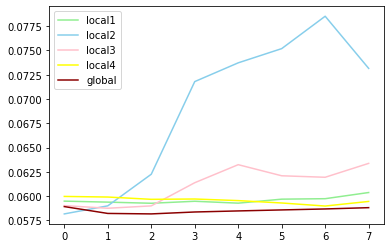

In [14]:

local_model1 = [0.24388642820330014, 0.24367783005443272, 0.24343611712100477, 0.2438599250463936, 0.24346048301053172, 0.2443027511706573, 0.24440168468564513, 0.245698308216054]
local_model2 = [0.2411744010669218, 0.2428919528225293, 0.24949633562072077, 0.2679313475475351, 0.2715120451679048, 0.27419345127869504, 0.28020525415359976, 0.27045873585028046]
local_model3 = [0.2429366753265315, 0.24238040884064518, 0.24288229772847553, 0.24774377408455547, 0.25146382431087394, 0.24918144900504038, 0.24887285872312293, 0.25173021477670776]
local_model4 = [0.24487884187261566, 0.24475195031436028, 0.24426863846151525, 0.2443354465096093, 0.2439997636155027, 0.2434957492232455, 0.24285045459669652, 0.24382428928989922]
global_model = [0.24273368479404095, 0.24127751986979534, 0.24117675503122624, 0.24158574994493326, 0.2418120153071456, 0.24202468128515106, 0.2422311695442926, 0.24250589868277236]
x = []
loss_local1 = []
loss_local2 = []
loss_local3 = []
loss_local4 = []
loss_global = []
for i in range(0,len(local_model1)):
    x.append(i)
    loss_local1.append(local_model1[i]**2)
    loss_local2.append(local_model2[i]**2)
    loss_local3.append(local_model3[i]**2)
    loss_local4.append(local_model4[i]**2)
    loss_global.append(global_model[i]**2)
plt.plot(x,loss_local1,label="local1",c="lightgreen")
plt.plot(x,loss_local2,label="local2",c="skyblue")
plt.plot(x,loss_local3,label="local3",c="pink")
plt.plot(x,loss_local4,label="local4",c="yellow")
plt.plot(x,loss_global,label = "global",c="darkred")
plt.legend()
#plt.ylim(0.057,0.062)
plt.show()

In [17]:
client_model = {}
client_model['client'] = 1
client_model['scaling_factor'] = 0.1

In [18]:
client_model

{'client': 1, 'scaling_factor': 0.1}